In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
K.set_image_data_format('channels_last')

import matplotlib.pyplot as plt

%matplotlib inline

Using TensorFlow backend.


In [2]:
batch_size = 128
num_classes = 10
epochs = 12

### 载入数据集

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

In [4]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [6]:
input_shape

(28, 28, 1)

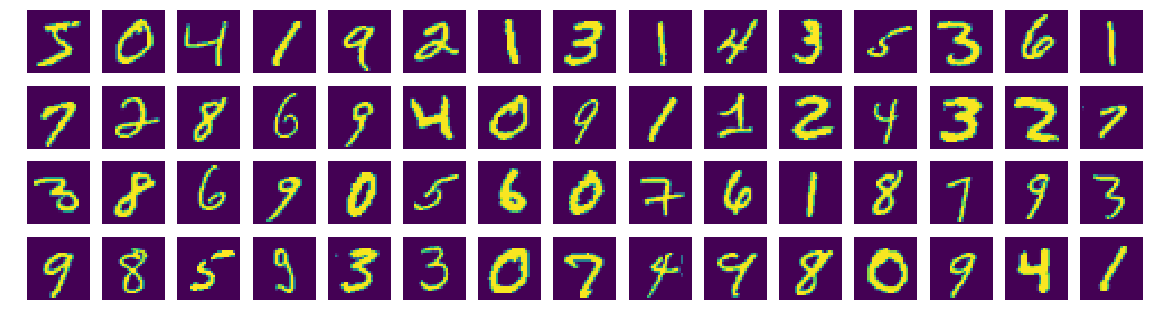

In [7]:
# 绘制训练样本图片集 前60张
X_orig = x_train[:60, :, :, 0]
num_images = X_orig.shape[0]
row = 15
col = np.ceil(num_images / row)
plt.figure(figsize=(20, 20 * col / row))
for i, img in enumerate(X_orig):
    plt.subplot(col, row, i + 1)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')

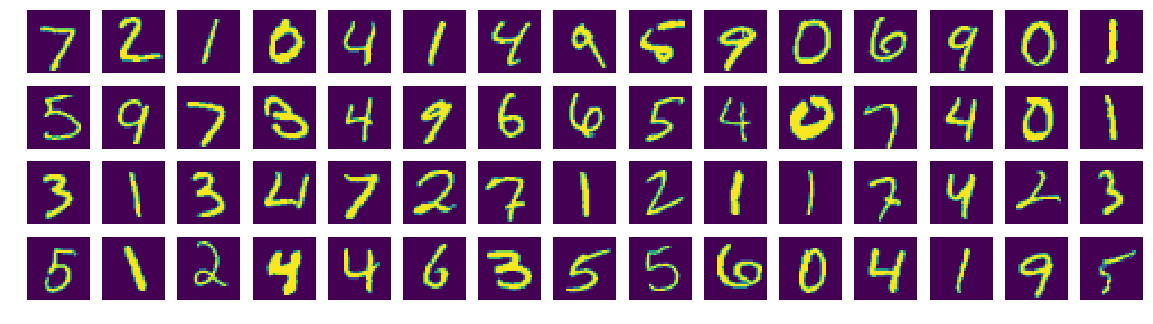

In [8]:
# 绘制测试样本图片集 前60张
X_orig = x_test[:60, :, :, 0]
num_images = X_orig.shape[0]
row = 15
col = np.ceil(num_images / row)
plt.figure(figsize=(20, 20 * col / row))
for i, img in enumerate(X_orig):
    plt.subplot(col, row, i + 1)
    plt.imshow(img, interpolation='nearest')
    plt.axis('off')

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
# convert class vectors to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### 建模

In [11]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

### 训练模型

In [13]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 121s 2ms/step - loss: 0.2769 - acc: 0.9136 - val_loss: 0.0577 - val_acc: 0.9809
Epoch 2/12
60000/60000 [==============================] - 120s 2ms/step - loss: 0.0945 - acc: 0.9721 - val_loss: 0.0438 - val_acc: 0.9870
Epoch 3/12
60000/60000 [==============================] - 119s 2ms/step - loss: 0.0692 - acc: 0.9793 - val_loss: 0.0375 - val_acc: 0.9877
Epoch 4/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0560 - acc: 0.9831 - val_loss: 0.0357 - val_acc: 0.9876
Epoch 5/12
60000/60000 [==============================] - 117s 2ms/step - loss: 0.0488 - acc: 0.9856 - val_loss: 0.0291 - val_acc: 0.9911
Epoch 6/12
60000/60000 [==============================] - 125s 2ms/step - loss: 0.0413 - acc: 0.9867 - val_loss: 0.0300 - val_acc: 0.9894
Epoch 7/12
60000/60000 [==============================] - 122s 2ms/step - loss: 0.0379 - acc: 0.9883 - val_loss: 0.0273 - 

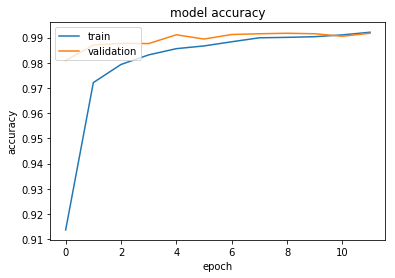

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

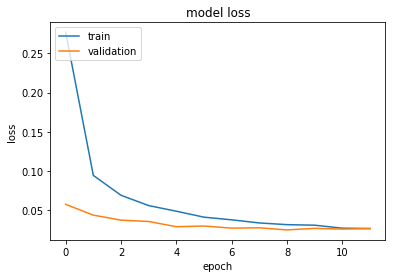

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### 评估模型

In [16]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 6s 589us/step
Test loss: 0.026641963962388944
Test accuracy: 0.9917
